In [1]:
# This sets up the graphs
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'

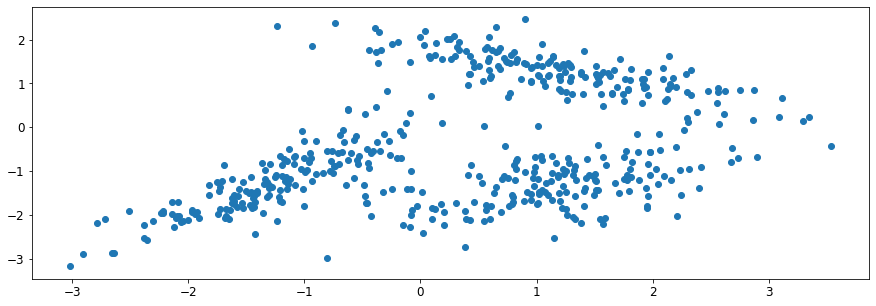

In [2]:
# Let's make some data!
import numpy as np
from sklearn import datasets
###
# REPLACE <addClusterData> WITH cluster_data AND <addOutput> WITH output
###
cluster_data, output = datasets.make_classification(n_samples = 500, n_features = 2, n_informative = 2, n_redundant = 0, n_repeated = 0,
                                                    n_classes = 3, n_clusters_per_class = 1, class_sep = 1.25, random_state = 6)
###
# Let's visualise it
graph.scatter(cluster_data.T[0], cluster_data.T[1])
graph.show()

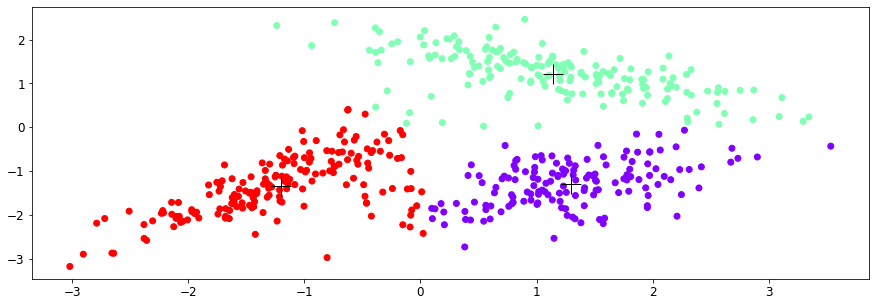

In [3]:
from sklearn.cluster import KMeans
###
# REPLACE <addKMeans> WITH KMeans
###
k_means = KMeans(n_clusters=3)
###
###
# REPLACE <addFit> WITH fit
###
k_means.fit(cluster_data)
###
# Let's visualise it
###
# REPLACE <addClusterCenters> BELOW WITH k_means.cluster_centers_
###
for mean in k_means.cluster_centers_:
    graph.plot(mean[0], mean[1], 'ko', marker = '+', markersize = 20)
###
###
# REPLACE <addLabels> BELOW WITH k_means.labels_
###
graph.scatter(cluster_data.T[0], cluster_data.T[1], c = k_means.labels_)
###
graph.show()

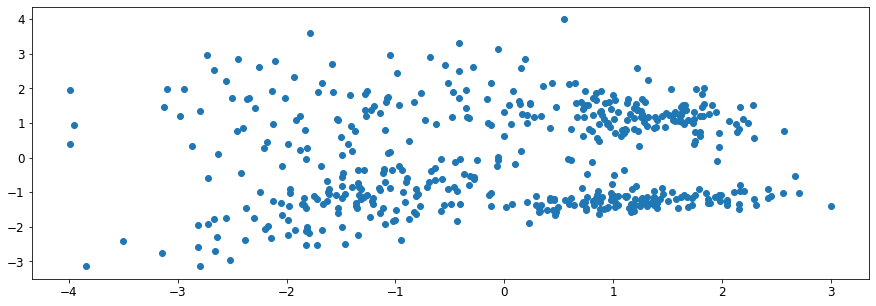

In [4]:
###
# REPLACE <addMakeClassification> BELOW WITH datasets.make_classification
###
cluster_data, output = datasets.make_classification(n_samples = 500, n_features = 2, n_informative = 2, n_redundant = 0, n_repeated = 0, 
                                            n_classes = 4, n_clusters_per_class = 1, class_sep = 1.25, random_state = 6)
###

graph.scatter(cluster_data.T[0], cluster_data.T[1])
graph.show()

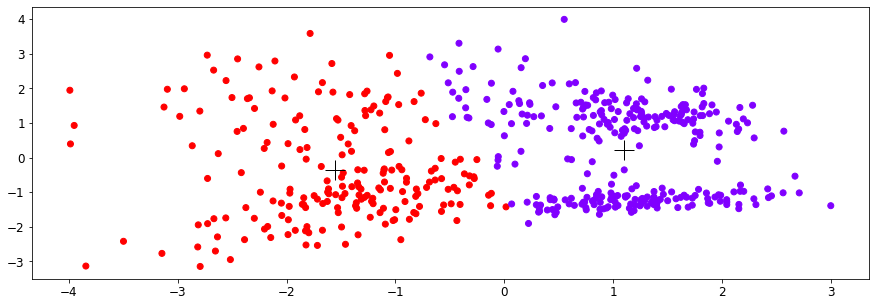

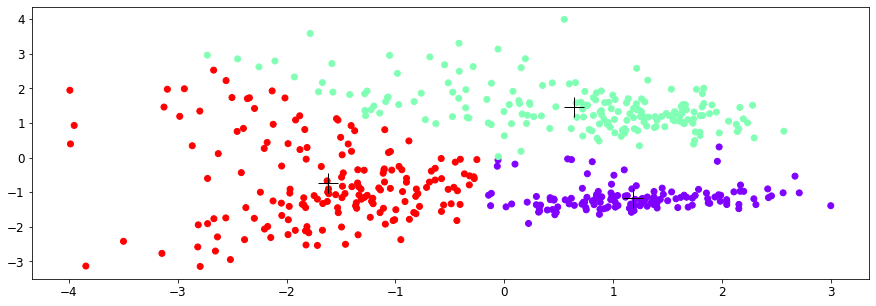

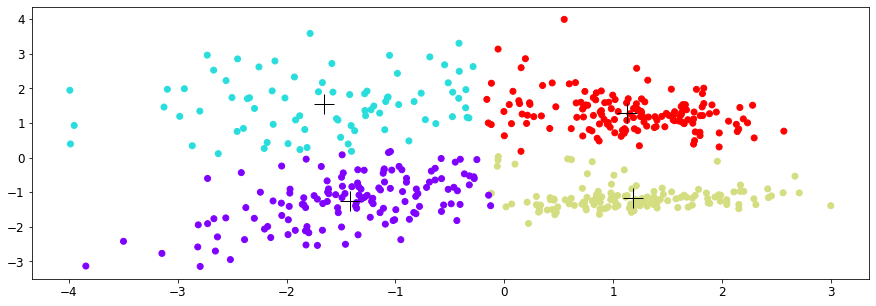

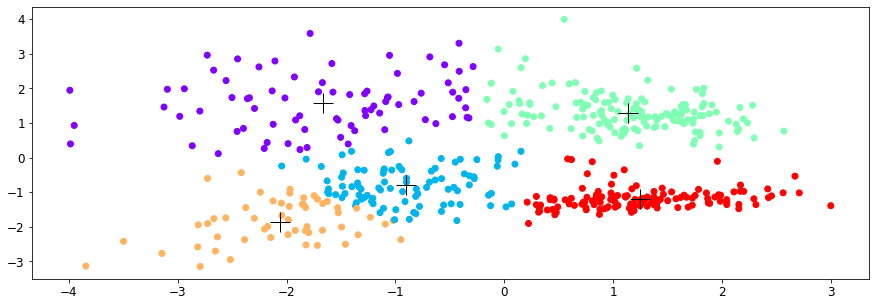

In [6]:
###
# REPLACE <addNHere> BELOW WITH n
###
for n in range(2,6):
    k_means = KMeans(n_clusters = n).fit(cluster_data)
###
    for mean in k_means.cluster_centers_:
        graph.plot(mean[0], mean[1], 'ko', marker = '+', markersize = 20)
    graph.scatter(cluster_data.T[0], cluster_data.T[1], c = k_means.labels_)
    graph.show()

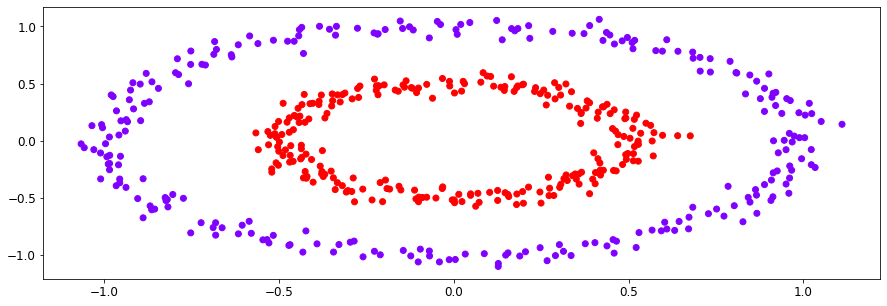

In [7]:
###
# REPLACE <addMakeCircles> BELOW WITH make_circles
###
ring_data, target = datasets.make_circles(n_samples = 500, factor = .5, noise = 0.05, random_state = 6)
###

graph.scatter(ring_data.T[0], ring_data.T[1], c = target)
graph.show()

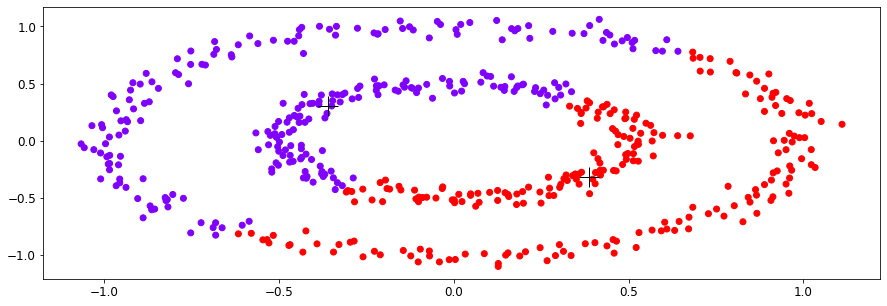

In [8]:
###
# REPLACE <addRingData> BELOW WITH ring_data
###
k_means = KMeans(n_clusters = 2).fit(ring_data)
###
for mean in k_means.cluster_centers_:
    graph.plot(mean[0], mean[1], 'ko', marker = '+', markersize = 20)
graph.scatter(ring_data.T[0], ring_data.T[1], c = k_means.labels_)
graph.show()

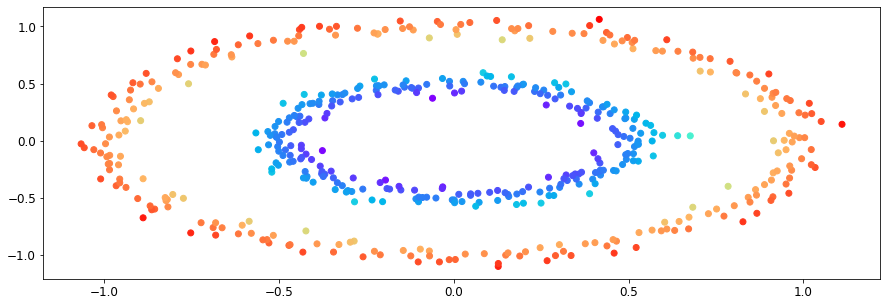

In [9]:
distance_from_center = []
for sample in ring_data:
###
# REPLACE <addSqrt> BELOW WITH np.sqrt
###
    z = 4 * np.sqrt(sample[0]**2 + sample[1]**2)
###
    distance_from_center.append(z)
# Make it a three-dimensional dataset
ring_data = np.concatenate((ring_data, np.array(distance_from_center).reshape(-1, 1)), axis = 1)

graph.scatter(ring_data.T[0], ring_data.T[1], c = ring_data.T[2])
graph.show()

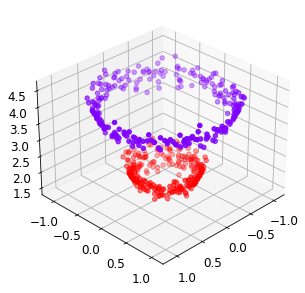

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = graph.figure()
###
# REPLACE <addProjection> BELOW WITH projection='3d'
###
ax = fig.add_subplot(111, projection='3d')
###

###
# REPLACE <addRingDataT> BELOW WITH ring_data.T[2]
###
ax.scatter(ring_data.T[0], ring_data.T[1], ring_data.T[2], c = target)
###

ax.view_init(30, 45)
graph.show()

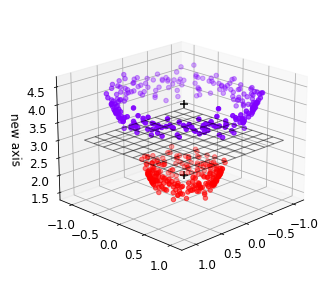

In [11]:
###
# REPLACE <addRingData> BELOW WITH ring_data
###
k_means = KMeans(n_clusters = 2, random_state = 0).fit(ring_data)
###
fig = graph.figure()
ax = fig.add_subplot(111, projection='3d')
for mean in k_means.cluster_centers_:
    ax.scatter(mean[0], mean[1], mean[2], c='black', marker='+', s=50) # plot the cluster centres 
###
# REPLACE <addLabels> BELOW WITH k_means.labels_
###
ax.scatter(ring_data.T[0], ring_data.T[1], ring_data.T[2], c = k_means.labels_)
###
# We can plot a hyperplane that separates the two rings
hp_X, hp_Y = np.array(np.meshgrid(np.linspace(-1, 1, 11), np.linspace(-1, 1, 11)))
hp_Z = np.full(hp_X.shape, np.abs(k_means.cluster_centers_[0][2] - k_means.cluster_centers_[1][2] / 2))
ax.plot_wireframe(hp_X, hp_Y, hp_Z, rstride = 1, cstride = 1, 
                  color = 'k', linewidth = 1, linestyle = 'solid', alpha = 0.5)

ax.view_init(20, 45)
ax.set_zlabel('new axis')
graph.show()

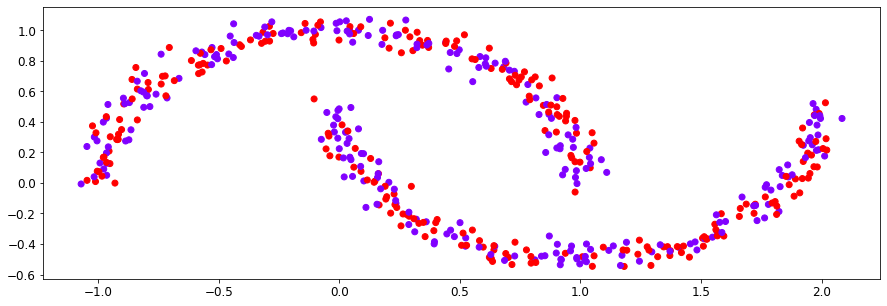

In [12]:
###
# REPLACE <addMakeMoons> BELOW WITH datasets.make_moons
###
crescent_data, output = datasets.make_moons(n_samples = 500, noise = .05)
###
graph.scatter(crescent_data.T[0], crescent_data.T[1], c = target)
graph.show()

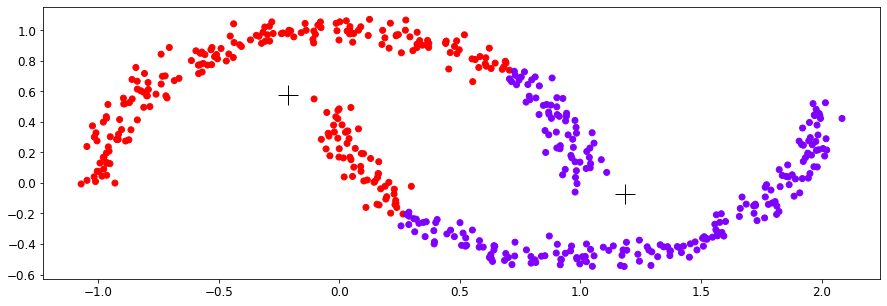

In [13]:
# Below we run KMeans on crescent_data using n_clusters = 2
###
# REPLACE <addCrescentData> WITH crescent_data
###
k_means = KMeans(n_clusters = 2).fit(crescent_data)
###
for mean in k_means.cluster_centers_:
    graph.plot(mean[0], mean[1], 'ko', marker = '+', markersize = 20)
graph.scatter(crescent_data.T[0], crescent_data.T[1], c = k_means.labels_)
graph.show()

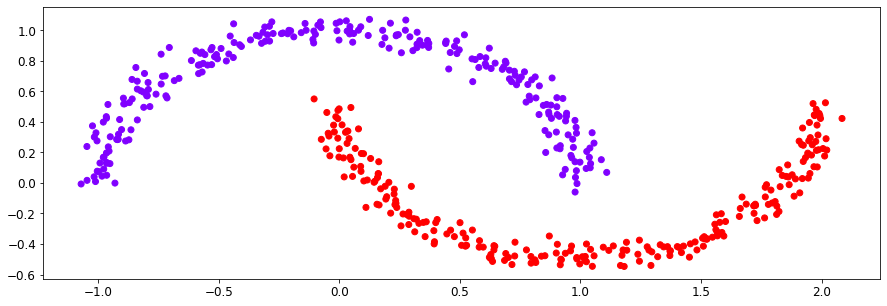

In [14]:
from sklearn import cluster
###
# REPLACE <addSpectralClustering> BELOW WITH SpectralClustering
###
spectral = cluster.SpectralClustering(n_clusters = 2, eigen_solver = 'arpack', affinity = 'nearest_neighbors')
###
###
# REPLACE <addCrescentData> BELOW WITH crescent_data
###
labels_ = spectral.fit_predict(crescent_data)
###
### 
# REPLACE <addLabels> BELOW WITH labels_
###
graph.scatter(crescent_data.T[0], crescent_data.T[1], c = labels_)
###
graph.show()

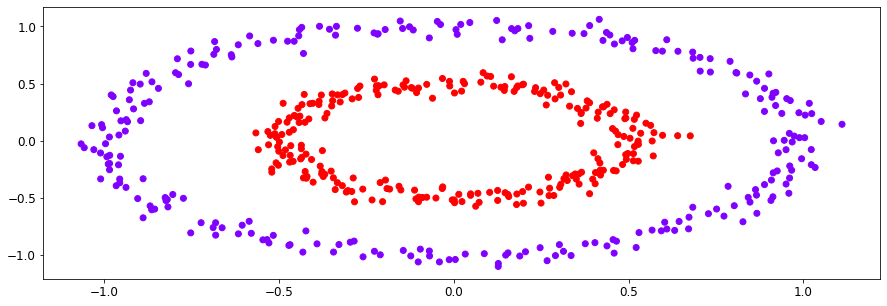

In [16]:
# Let's use spectral clustering on the ring_data
###
# REPLACE <addSpectralClustering> BELOW WITH SpectralClustering
###
spectral = cluster.SpectralClustering(n_clusters = 2, eigen_solver = 'arpack', affinity = 'nearest_neighbors')
###
###
# REPLACE <addRingData> BELOW WITH ring_data
###
labels_ = spectral.fit_predict(ring_data)
###
###
# REPLACE <addLabels> BELOW WITH labels_
###
graph.scatter(ring_data.T[0], ring_data.T[1], c = labels_)
###
graph.show()